Install AWS CLI first

In [7]:
import os
import shutil

### Download SGNex data

In [8]:
# Download all the direct DNA data from SGNex   (~18.4gb)
# !aws s3 sync --no-sign-request s3://sg-nex-data/data/processed_data/m6Anet/ .

In [9]:
# Delete flatten the directory and delete everything that is not data.json

# root_dir = '../data/sgnex'
# # Task 1: Rename data.json to [parent folder name]_data.json
# for root, dirs, files in os.walk(root_dir):
#     for file in files:
#         if file == 'data.json':
#             folder_name = os.path.basename(root)
#             new_file_name = f'{folder_name}_data.json'
#             print(new_file_name)
#             os.rename(os.path.join(root, file), os.path.join(root, new_file_name))


In [10]:
# # Flatten the directory structure and move data.json to sgnex/
# for root, dirs, files in os.walk(root_dir):
#     for file in files:
#         if file.endswith('_data.json'):
#             shutil.move(os.path.join(root, file), os.path.join(root_dir, file))


In [11]:
# # Flatten the directory structure and delete the other folders
# for files in os.listdir(root_dir):
#     if os.path.isdir(f'../data/sgnex/{files}'):
#         shutil.rmtree(f'../data/sgnex/{files}')

In [12]:
# sgnex_datasets = os.listdir("../data/sgnex/")

# Load in XG preprocess data

In [13]:
import pandas as pd
import json
import numpy as np
import os

In [14]:
lst = []
for fname in os.listdir("../data/sgnex/predictions/unfiltered_predictions/"):
    print(fname)
    df = pd.read_csv(f"../data/sgnex/predictions/unfiltered_predictions/{fname}")
    df["label"] = np.where(df["score"]>=0.9,1,0)
    print(df.shape)
    print(df[["score","label"]].groupby(by="label").count())
    lst.append((fname,df))
    print("===========")

SGNex_A549_directRNA_replicate5_run1_data_predictions.csv
(1008933, 4)
        score
label        
0      964423
1       44510
SGNex_A549_directRNA_replicate6_run1_data_predictions.csv


(1500579, 4)
         score
label         
0      1419673
1        80906
SGNex_Hct116_directRNA_replicate3_run1_data_predictions.csv
(1391230, 4)
         score
label         
0      1321261
1        69969
SGNex_Hct116_directRNA_replicate3_run4_data_predictions.csv
(1302514, 4)
         score
label         
0      1226778
1        75736
SGNex_Hct116_directRNA_replicate4_run3_data_predictions.csv
(1599747, 4)
         score
label         
0      1488108
1       111639
SGNex_HepG2_directRNA_replicate5_run2_data_predictions.csv
(1580887, 4)
         score
label         
0      1511776
1        69111
SGNex_HepG2_directRNA_replicate6_run1_data_predictions.csv
(1564890, 4)
         score
label         
0      1471566
1        93324
SGNex_K562_directRNA_replicate4_run1_data_predictions.csv
(1104444, 4)
         score
label         
0      1054123
1        50321
SGNex_K562_directRNA_replicate5_run1_data_predictions.csv
(1052601, 4)
         score
label         
0      1005081
1        47520
SG

In [15]:
lst[0]

('SGNex_A549_directRNA_replicate5_run1_data_predictions.csv',
            transcript_id  transcript_position     score  label
 0        ENST00000418539                  108  0.017726      0
 1        ENST00000418539                  139  0.003720      0
 2        ENST00000383898                   75  0.001517      0
 3        ENST00000610460                   78  0.142608      0
 4        ENST00000619779                   78  0.407804      0
 ...                  ...                  ...       ...    ...
 1008928  ENST00000540302                 2434  0.001662      0
 1008929  ENST00000540302                 2522  0.079476      0
 1008930  ENST00000540302                 2537  0.117834      0
 1008931  ENST00000540302                 2543  0.081514      0
 1008932  ENST00000540302                 2589  0.996577      1
 
 [1008933 rows x 4 columns])

### Analysis of the results

#### Download readcounts to filter out (transcript_id, transcript_position) with support >=100 reads

In [16]:
## Ran the code on google colab to get the readcounts
# !mkdir readcounts
# %cd readcounts
# !aws s3 ls --no-sign-request s3://sg-nex-data/data/processed_data/m6Anet/ | awk '{print $2}' > folder_list.txt
# !while read -r folder; do folder_name=$(basename "${folder}"); aws s3 cp --no-sign-request "s3://sg-nex-data/data/processed_data/m6Anet/${folder}data.readcount" "${folder_name}_data.readcounts"; done < folder_list.txt
# !rm folder_list.txt
# %cd ../
# !zip -r readcounts.zip readcounts/


## Filter predictions to get >= 100 reads

In [18]:
# import os
# import pandas as pd
# # Filter out xg predictions into those with >=100 reads
# for pred_fname in os.listdir("../data/sgnex/predictions/unfiltered_predictions/"):
#     readcount_fname = pred_fname.replace("_predictions.csv",".readcounts")
#     pred_df = pd.read_csv(f"../data/sgnex/predictions/unfiltered_predictions/{pred_fname}")
#     reads_df = pd.read_csv(f"../data/sgnex/readcounts/{readcount_fname}")
#     filtered_df = pred_df.merge(reads_df, how="left", on=["transcript_id", "transcript_position"])
#     filtered_df = filtered_df[filtered_df["n_reads"]>=100]
#     filtered_df.to_csv(f"../data/sgnex/predictions/filtered_predictions/{pred_fname}")



## Generate plots for presentation

In [19]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import os
import numpy as np


In [20]:
prediction_filenames = os.listdir("../data/sgnex/predictions/filtered_predictions/")

In [21]:
prediction_filenames

['SGNex_A549_directRNA_replicate5_run1_data_predictions.csv',
 'SGNex_A549_directRNA_replicate6_run1_data_predictions.csv',
 'SGNex_Hct116_directRNA_replicate3_run1_data_predictions.csv',
 'SGNex_Hct116_directRNA_replicate3_run4_data_predictions.csv',
 'SGNex_Hct116_directRNA_replicate4_run3_data_predictions.csv',
 'SGNex_HepG2_directRNA_replicate5_run2_data_predictions.csv',
 'SGNex_HepG2_directRNA_replicate6_run1_data_predictions.csv',
 'SGNex_K562_directRNA_replicate4_run1_data_predictions.csv',
 'SGNex_K562_directRNA_replicate5_run1_data_predictions.csv',
 'SGNex_K562_directRNA_replicate6_run1_data_predictions.csv',
 'SGNex_MCF7_directRNA_replicate3_run1_data_predictions.csv',
 'SGNex_MCF7_directRNA_replicate4_run1_data_predictions.csv']

### Check if there are any predictions which differ between (transcript_id, transcript_position) within each cell line

In [22]:
dic = {}
for fname in prediction_filenames:
    _,cell_line,_,rep,run,*_ = fname.split("_")
    if cell_line not in dic:
        dic[cell_line] = []
    df = pd.read_csv(f"../data/sgnex/predictions/filtered_predictions/{fname}")
    df["label"] = (df['score'] >= 0.9).astype(int)
    df = df[["transcript_id","transcript_position","label", "score"]]
    dic[cell_line].append(df)

In [23]:
common_df = {}
for cell_line in dic:
    df_list = dic[cell_line]
    common_ids = df_list[0]
    for df in df_list[1:]:
        common_ids = pd.merge(common_ids, df, on=["transcript_id", "transcript_position"], how="inner")
    common_df[cell_line] = common_ids


In [24]:
for cell_line in common_df:
    common_ids = common_df[cell_line]
    if common_ids.shape[1] == 5:
        print(f"Currently at {cell_line}")
        print(common_ids[~((common_ids["label_x"]==common_ids["label_y"])|
                           (common_ids["label_x"]==common_ids["label"])|
                           (common_ids["label_y"]==common_ids["label"])
                           )])
        print("="*20)
    else:
        print(f"Currently at {cell_line}")
        print(common_ids[~(common_ids["label_x"]==common_ids["label_y"])])
        print("="*20)

Currently at A549
        transcript_id  transcript_position  label_x   score_x  label_y  \
94    ENST00000414002                  346        0  0.577746        1   
215   ENST00000361624                  242        0  0.741892        1   
295   ENST00000361227                  334        0  0.085806        1   
416   ENST00000260379                  484        0  0.099085        1   
511   ENST00000269321                 1367        1  0.904466        0   
...               ...                  ...      ...       ...      ...   
8758  ENST00000301072                  191        1  0.902967        0   
8876  ENST00000400137                  627        0  0.805825        1   
8976  ENST00000270776                 1688        0  0.870580        1   
9317  ENST00000630979                  809        0  0.784292        1   
9390  ENST00000635567                  671        1  0.905662        0   

       score_y  
94    0.917999  
215   0.904235  
295   0.917701  
416   0.949851  
511   0.

Some rows cell_lines have differring predictions ? o.0

In [25]:
## some basic info about the predictions
import os
import pandas as pd

sgnex_data_rows = {}
# Filter out xg predictions into those with >=100 reads
for pred_fname in os.listdir("../data/sgnex/predictions/unfiltered_predictions/"):
    readcount_fname = pred_fname.replace("_predictions.csv",".readcounts")
    pred_df = pd.read_csv(f"../data/sgnex/predictions/unfiltered_predictions/{pred_fname}")
    reads_df = pd.read_csv(f"../data/sgnex/readcounts/{readcount_fname}")
    filtered_df = pred_df.merge(reads_df, how="left", on=["transcript_id", "transcript_position"])
    unfiltered_m6a = len(filtered_df[filtered_df["score"]>=0.9])
    unfiltered_nom6a = len(filtered_df[~(filtered_df["score"]>=0.9)])
    filtered_df = filtered_df[filtered_df["n_reads"]>=100]
    filtered_m6a = len(filtered_df[filtered_df["score"]>=0.9])
    filtered_nom6a = len(filtered_df[~(filtered_df["score"]>=0.9)])
    sgnex_data_rows[pred_fname] = {"filtered": {"m6a":filtered_m6a , "nom6a": filtered_nom6a} , 
                                   "unfiltered":{"m6a":unfiltered_m6a, "nom6a":unfiltered_nom6a }}



In [26]:
for fname  in sgnex_data_rows:
    data = sgnex_data_rows[fname]
    sgnex, cell_line, drna, replicate, run , *_ = fname.split("_")
    fname = f'{cell_line}_{replicate}_{run}'
    print(f'{fname}: Total number of DRACH motifs: {sum(data["unfiltered"].values())}')
    print(f'Out of which, {data["unfiltered"]["nom6a"]}({data["unfiltered"]["nom6a"]/sum(data["unfiltered"].values()):.2f}%) are non-m6a')
    print(f'Out of which, {data["unfiltered"]["m6a"]}({data["unfiltered"]["m6a"]/sum(data["unfiltered"].values()):.2f}%) are m6a')
    print(f'{fname}: Total number of DRACH motifs with reads >=100 : {sum(data["filtered"].values())}')
    print(f'Out of which, {data["filtered"]["nom6a"]}({data["filtered"]["nom6a"]/sum(data["filtered"].values()):.2f}%) are non-m6a')
    print(f'Out of which, {data["filtered"]["m6a"]}({data["filtered"]["m6a"]/sum(data["filtered"].values()):.2f}%)  are m6a')
    print("="*40)

A549_replicate5_run1: Total number of DRACH motifs: 1008933
Out of which, 964423(0.96%) are non-m6a
Out of which, 44510(0.04%) are m6a
A549_replicate5_run1: Total number of DRACH motifs with reads >=100 : 9473
Out of which, 9287(0.98%) are non-m6a
Out of which, 186(0.02%)  are m6a
A549_replicate6_run1: Total number of DRACH motifs: 1500579
Out of which, 1419673(0.95%) are non-m6a
Out of which, 80906(0.05%) are m6a
A549_replicate6_run1: Total number of DRACH motifs with reads >=100 : 31301
Out of which, 30219(0.97%) are non-m6a
Out of which, 1082(0.03%)  are m6a
Hct116_replicate3_run1: Total number of DRACH motifs: 1391230
Out of which, 1321261(0.95%) are non-m6a
Out of which, 69969(0.05%) are m6a
Hct116_replicate3_run1: Total number of DRACH motifs with reads >=100 : 24538
Out of which, 23854(0.97%) are non-m6a
Out of which, 684(0.03%)  are m6a
Hct116_replicate3_run4: Total number of DRACH motifs: 1302514
Out of which, 1226778(0.94%) are non-m6a
Out of which, 75736(0.06%) are m6a
Hct11

#### Plotting 8c

In [27]:
plotting_filenames = os.listdir("../data/sgnex/plotting/")
prediction_filenames = os.listdir("../data/sgnex/predictions/filtered_predictions/")

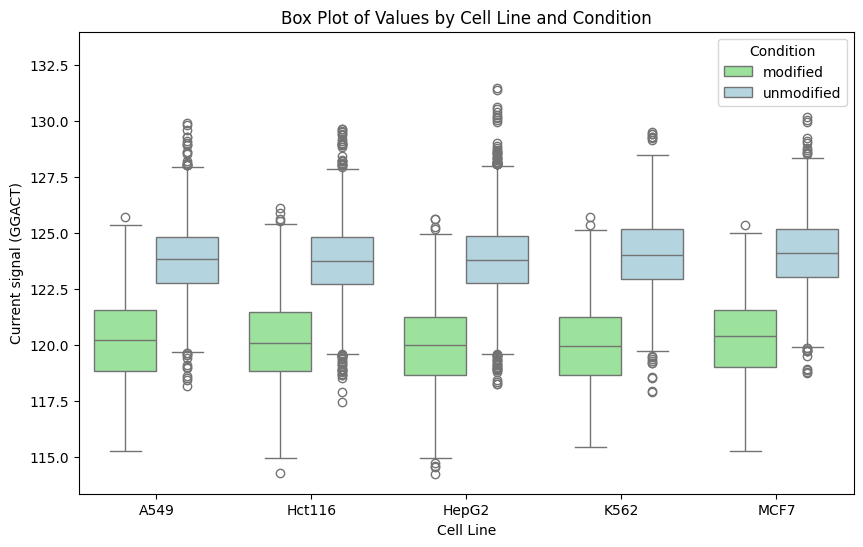

In [28]:
df_dict = {}  # { cell_line : { 0 : [], 1: [] } ....}
for (pred_fname, plot_fname) in zip(prediction_filenames, plotting_filenames):
    _,pred_cell_line, _, pred_repl, pred_run, *_ = pred_fname.split("_")
    _,plot_cell_line, _, plot_repl, plot_run, *_ = plot_fname.split("_")
    assert((pred_cell_line == plot_cell_line ) and (pred_repl == plot_repl) and (pred_run ==plot_run))
    predictions = pd.read_csv(f"../data/sgnex/predictions/filtered_predictions/{pred_fname}")
    predictions["label"] = (predictions['score'] >= 0.9).astype(int)

    #plot file need use json
    with open(f"../data/sgnex/plotting/{plot_fname}", 'r') as json_file:
        loaded_data = json.load(json_file)
    loaded_data = {(k.split(",")[0], int(k.split(",")[1])):v for k,v in loaded_data.items()}
    loaded_df = pd.DataFrame([[transcript_id, transcript_position, sum(values)/len(values)] for (transcript_id, transcript_position),values in loaded_data.items()], columns=["transcript_id", "transcript_position", "values"])
    # Merge the original DataFrame with the loaded DataFrame on "transcript_id" and "transcript_position"
    merged_df = predictions.merge(loaded_df, on=["transcript_id", "transcript_position"], how="inner")

    # Filter rows with label 0 and label 1 and store values in separate lists
    zero_list = merged_df[merged_df["label"] == 0]["values"].explode().tolist()
    one_list = merged_df[merged_df["label"] == 1]["values"].explode().tolist()
    
    if pred_cell_line not in df_dict:
        df_dict[pred_cell_line] = {"modified":[], "unmodified":[]}
    df_dict[pred_cell_line]["modified"].extend(one_list)
    df_dict[pred_cell_line]["unmodified"].extend(zero_list)        


boxplot_data = []

for cell_line,values in df_dict.items():
    for condition, value_list in values.items():
        boxplot_data.extend([(cell_line, condition, value) for value in value_list])

boxplot_df = pd.DataFrame(boxplot_data, columns=['Cell Line', 'Condition', 'Current signal (GGACT)'])

# Create a box plot using Seaborn
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cell Line', y='Current signal (GGACT)', hue='Condition', data=boxplot_df, palette = {'unmodified': 'lightblue', 'modified': 'lightgreen'})
plt.title('Box Plot of Values by Cell Line and Condition')
# print(plt.gca().get_ylim())
plt.ylim(113.34839124999998, 134)
plt.show()

## 8d Plot

In [29]:
# 12x12 matrix, for each cell => calculate odd ratio / # of overlapping sites

## Number of overlapping sites
filenames_in_paper_order = [ "SGNex_K562_directRNA_replicate4_run1_data_predictions.csv",
                            "SGNex_K562_directRNA_replicate5_run1_data_predictions.csv",
                            "SGNex_K562_directRNA_replicate6_run1_data_predictions.csv",
                            "SGNex_MCF7_directRNA_replicate3_run1_data_predictions.csv",
                            "SGNex_MCF7_directRNA_replicate4_run1_data_predictions.csv",
                            "SGNex_A549_directRNA_replicate5_run1_data_predictions.csv",
                            "SGNex_A549_directRNA_replicate6_run1_data_predictions.csv",
                            "SGNex_Hct116_directRNA_replicate3_run1_data_predictions.csv",#here
                            "SGNex_Hct116_directRNA_replicate4_run3_data_predictions.csv",
                            "SGNex_Hct116_directRNA_replicate3_run4_data_predictions.csv", #swapped
                            "SGNex_HepG2_directRNA_replicate5_run2_data_predictions.csv",
                            "SGNex_HepG2_directRNA_replicate6_run1_data_predictions.csv"


] #K,M,A, HCT,Hep
# index_cell_line_mapping = {i:cell_line for i,cell_line in enumerate(prediction_filenames)}
index_cell_line_mapping = {i:cell_line for i,cell_line in enumerate(filenames_in_paper_order)}

In [30]:
cell_line_m6a_positive = {}
cell_line_m6a_negative = {}
threshold = 0.9
for pred_fname in prediction_filenames:
    _,pred_cell_line, _, pred_repl, pred_run, *_ = pred_fname.split("_")
    predictions = pd.read_csv(f"../data/sgnex/predictions/filtered_predictions/{pred_fname}")
    predictions_pos = predictions[predictions["score"]>=threshold]
    predictions_neg = predictions[~(predictions["score"]>=threshold)]
    cell_line_m6a_positive[pred_fname] = set(zip(predictions_pos['transcript_id'], predictions_pos['transcript_position']))
    cell_line_m6a_negative[pred_fname] = set(zip(predictions_neg['transcript_id'],predictions_neg['transcript_position']))

In [31]:
from scipy.stats import fisher_exact
matrix_8e_fischer = []

for i in range(12):
    row = []
    set_1 = cell_line_m6a_positive[index_cell_line_mapping[i]]
    set_1_neg = cell_line_m6a_negative[index_cell_line_mapping[i]]
    for j in range(12):
        set_2 = cell_line_m6a_positive[index_cell_line_mapping[j]]
        set_2_neg = cell_line_m6a_negative[index_cell_line_mapping[j]]
        # Create a 2x2 contingency table
        a = len(set_1 & set_2) # Number of cases with both variables present
        b = len(set_1 - set_2)   # Number of cases with the first variable present but the second variable not
        c = len(set_2 - set_1)   # Number of cases with the first variable not present but the second variable present
        d = len(set_1_neg & set_2_neg)  # Number of cases with both variables not present
        # Perform Fisher's exact test to get the p-value
        odds_ratio, p_value = fisher_exact([[a, b], [c, d]])
        row.append(odds_ratio)
    matrix_8e_fischer.append(row)


In [32]:
second_highest = sorted({value for row in matrix_8e_fischer for value in row}, reverse=True)[1]
second_highest

783.7456395348837

In [33]:
matrix_8e_fischer_replace = [[0 for _ in range(12)] for _ in range(12)]
for i in range(12):
    for j in range(12):
        if matrix_8e_fischer[i][j] == float("inf"):
            matrix_8e_fischer_replace[i][j] = second_highest
        else:
            matrix_8e_fischer_replace[i][j] = matrix_8e_fischer[i][j]

In [34]:
heatmap_df = pd.DataFrame(matrix_8e_fischer_replace)
heatmap_df.columns =  [
    "_".join(filename.split("_")[1:2] + filename.split("_")[3:5]) for filename in filenames_in_paper_order
]
heatmap_df.index = [
    "_".join(filename.split("_")[1:2] + filename.split("_")[3:5]) for filename in filenames_in_paper_order
]

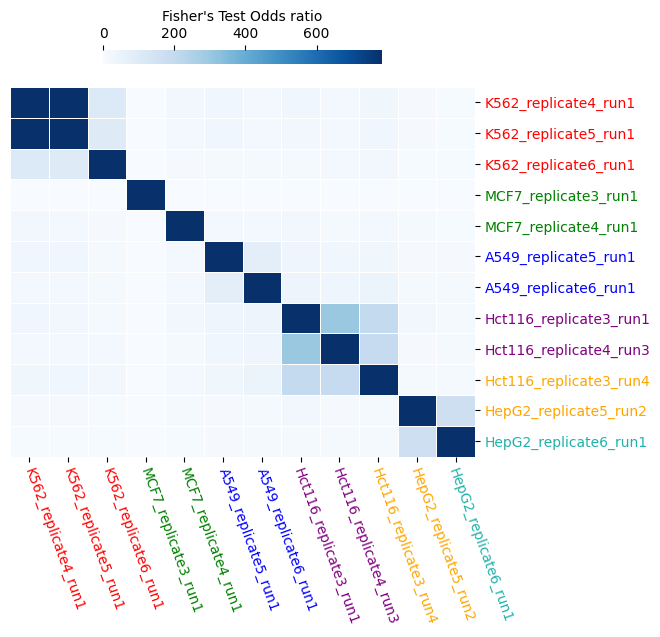

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))

# Create the heatmap with the color bar Sat the top
heatmap = sns.heatmap(heatmap_df, fmt='.2f', cmap='Blues', linewidths=0.5,
                     cbar_kws = {'use_gridspec': False, 'location': 'top', "shrink":0.6, 'label':"Fisher's Test Odds ratio"})

heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation = 0)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 290)
heatmap.yaxis.tick_right()

# Define custom color lists for x and y axis labels
tick_colors = ['red'] * 3 + ['green'] * 2 + ['blue'] * 2 + ['purple'] * 2 + ['orange'] * 2 + ['lightseagreen'] * 2

# # Set custom tick label colors for x-axis and y-axis
for tick, color in zip(heatmap.get_xticklabels(), tick_colors):
    tick.set_color(color)

for tick, color in zip(heatmap.get_yticklabels(), tick_colors):
    tick.set_color(color)

import matplotlib.transforms as mtrans
# ...
trans = mtrans.Affine2D().translate(25, 0)
for t in heatmap.get_xticklabels():
    t.set_transform(t.get_transform()+trans)

# Show the plot
plt.show()


### 8e plot

In [36]:
prediction_filenames = os.listdir("../data/sgnex/predictions/filtered_predictions/")

In [37]:
## { Cell line : {(t_id, pos) : [], ..... }   # 2 methods...:  sum(lst)/len(lst)  or  sum(lst)/#replicates
replicate_counts = {} # cell_line: count
data_by_cell_line = {}

for pred_fname in prediction_filenames:
    _,pred_cell_line, _, pred_repl, pred_run, *_ = pred_fname.split("_")
    if pred_cell_line not in replicate_counts:
        replicate_counts[pred_cell_line] = 0
    replicate_counts[pred_cell_line] += 1

    if pred_cell_line not in data_by_cell_line:
        data_by_cell_line[pred_cell_line] = {}
    predictions = pd.read_csv(f"../data/sgnex/predictions/filtered_predictions/{pred_fname}")
    for _,row in predictions.iterrows():
        key = (row["transcript_id"], row["transcript_position"])
        score = row["score"]
        if key not in data_by_cell_line[pred_cell_line]:
            data_by_cell_line[pred_cell_line][key] = []
        data_by_cell_line[pred_cell_line][key].append(score) 
        



In [38]:
# average proability for 5 cell lines
avg_probability_by_cell_line = {}

for cell_line in data_by_cell_line:
    if cell_line not in avg_probability_by_cell_line:
        avg_probability_by_cell_line[cell_line] = {}
    for k,v in data_by_cell_line[cell_line].items():
        avg_probability_by_cell_line[cell_line][k] = sum(v)/len(v)


In [39]:
avg_probability_by_cell_line

{'A549': {('ENST00000389680', 103): 0.86891187,
  ('ENST00000389680', 166): 0.019804716,
  ('ENST00000389680', 179): 0.0029400571,
  ('ENST00000389680', 204): 0.0375970585,
  ('ENST00000389680', 218): 0.0062437755,
  ('ENST00000389680', 266): 0.0180725165,
  ('ENST00000389680', 330): 0.37543909,
  ('ENST00000389680', 350): 0.0903040625,
  ('ENST00000389680', 360): 0.22391135499999998,
  ('ENST00000389680', 371): 0.08438806,
  ('ENST00000389680', 389): 0.0015501724,
  ('ENST00000389680', 399): 0.6761816350000001,
  ('ENST00000389680', 415): 0.134801113,
  ('ENST00000389680', 421): 0.52850255,
  ('ENST00000389680', 456): 0.04639286,
  ('ENST00000389680', 479): 0.096146025,
  ('ENST00000389680', 492): 0.43557879,
  ('ENST00000389680', 514): 0.82933978,
  ('ENST00000389680', 523): 0.44449805,
  ('ENST00000389680', 574): 0.07903768750000001,
  ('ENST00000389680', 629): 0.040347991,
  ('ENST00000389680', 736): 0.134471885,
  ('ENST00000389680', 756): 0.004102007600000001,
  ('ENST00000389680

In [40]:
## just generate prof matrix form this:
prof_matrix_1 = {}
for cell_line in avg_probability_by_cell_line:
    for k,v in avg_probability_by_cell_line[cell_line].items():
        if k not in prof_matrix_1:
            prof_matrix_1[k] = {cell_line:np.NaN for cell_line in replicate_counts}
        prof_matrix_1[k][cell_line] = 1 if v >= 0.9 else 0

In [41]:
prof_df_1 = pd.DataFrame(prof_matrix_1).T

In [42]:
# Rows without NA values
rows_without_na_1 = prof_df_1[~(prof_df_1.isna().any(axis=1))]


In [43]:
print(prof_df_1.shape)
print(rows_without_na_1.shape)

(93477, 5)
(10182, 5)


In [44]:
green_bars_1 = {}   # row_sum : count
for _, row in prof_df_1.iterrows():
    rowsum = row.sum(skipna=True)
    if rowsum == 0:
        continue
    if rowsum not in green_bars_1:
        green_bars_1[rowsum] = 0
    green_bars_1[rowsum] += 1
    rowsum = row.sum(skipna=True)

In [45]:
green_bars_1

{1.0: 2884, 4.0: 158, 5.0: 153, 2.0: 615, 3.0: 286}

In [46]:
blue_bars_1 = {}
for _,row in rows_without_na_1.iterrows():
    rowsum = row.sum(skipna=True)
    if rowsum == 0:
        continue
    if rowsum not in blue_bars_1:
        blue_bars_1[rowsum] = 0  
    blue_bars_1[rowsum] += 1

In [47]:
blue_bars_1

{1.0: 70, 5.0: 153, 2.0: 52, 4.0: 39, 3.0: 21}

In [48]:
x = list(range(1,6))
y2 = [green_bars_1[i] for i in x]
y1 = [blue_bars_1[i] for i in x]

C:\Users\Edward\AppData\Local\Temp\ipykernel_32332\4047145322.py:45: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_elements = [Patch(label='Expressed in >= 1 cell line', color='lightgreen', edgecolor='black'),
C:\Users\Edward\AppData\Local\Temp\ipykernel_32332\4047145322.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  Patch(label='Expressed in all cell lines', color='lightblue', edgecolor='black')]


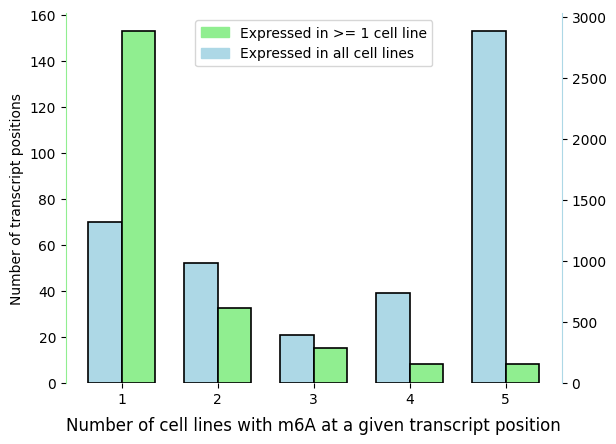

In [49]:
from matplotlib.patches import Patch

# Create a figure and primary axis
fig, ax1 = plt.subplots()

# Width of the bars
width = 0.35

# X-axis locations for the bars
x_values = [i for i in range(len(x))]

# Plot the bars for y1 on the primary y-axis with black outlines
bars1 = ax1.bar(x_values, y1, width, label='Expressed in >1 cell line', color='lightblue', edgecolor='black', linewidth=1.2)

# Set X-axis labels
ax1.set_xticks([x + width / 2 for x in x_values])
ax1.set_xticklabels(x)

# Set labels and title for the primary axis
# ax1.set_ylabel('Number of m6a sites', color='black')
ax1.set_ylabel('Number of transcript positions', color='black')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the bars for y2 on the secondary y-axis with black outlines
bars2 = ax2.bar([x + width for x in x_values], y2, width, label='Expressed in all cell lines', color='lightgreen', edgecolor='black', linewidth=1.2)

# Set labels for the secondary y-axis
# ax2.set_ylabel('Y2', color='g')
# ax2.set_ylabel('Number of m6a sites', color='black')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines["left"].set_color('lightgreen')
ax2.spines['top'].set_visible(False)
ax2.spines["right"].set_color("lightblue")
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)



# Combine the legends
legend_elements = [Patch(label='Expressed in >= 1 cell line', color='lightgreen', edgecolor='black'),
                   Patch(label='Expressed in all cell lines', color='lightblue', edgecolor='black')]
ax1.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.))

# plt.title('Number of cell lines', y=-0.15)  # Adjust the pad value
plt.title('Number of cell lines with m6A at a given transcript position', y=-0.15)

# Show the plot
plt.show()